In [2]:
from __future__ import division
from pandas import Series, DataFrame
import pandas as pd
from numpy.random import randn
import numpy as np

In [3]:
pd.options.display.max_rows = 12
np.set_printoptions(precision=4, suppress=True)

In [4]:
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(12, 4))

In [5]:
from datetime import datetime

In [6]:
now = datetime.now()

In [7]:
now

datetime.datetime(2018, 5, 7, 21, 50, 29, 138877)

In [8]:
delta = datetime(2011,1,7)-datetime(2008,6,24,8,15)

In [9]:
delta

datetime.timedelta(926, 56700)

In [10]:
delta.days

926

In [11]:
delta.seconds

56700

In [12]:
from datetime import timedelta

In [13]:
start = datetime(2011,1,7)

In [14]:
start + timedelta(12)

datetime.datetime(2011, 1, 19, 0, 0)

In [15]:
start - 2*timedelta(12)

datetime.datetime(2010, 12, 14, 0, 0)

In [16]:
#字符串转日期
stamp = datetime(2011,1,3)

In [17]:
str(stamp)

'2011-01-03 00:00:00'

In [18]:
stamp.strftime('%Y-%m-%d')

'2011-01-03'

In [19]:
value = '2011-01-03'

In [20]:
datetime.strptime(value, '%Y-%m-%d')

datetime.datetime(2011, 1, 3, 0, 0)

In [21]:
datestrs = ['7/6/2011','8/6/2011']

In [22]:
[datetime.strptime(x,'%m/%d/%Y') for x in datestrs]

[datetime.datetime(2011, 7, 6, 0, 0), datetime.datetime(2011, 8, 6, 0, 0)]

In [23]:
from dateutil.parser import parse

In [24]:
parse('2011-01-03')

datetime.datetime(2011, 1, 3, 0, 0)

In [25]:
parse('Jan 31,1997 10:45 PM')

datetime.datetime(2018, 1, 31, 22, 45)

In [26]:
parse('6/12/2011', dayfirst=True)

datetime.datetime(2011, 12, 6, 0, 0)

In [27]:
datestrs

['7/6/2011', '8/6/2011']

In [28]:
pd.to_datetime(datestrs)

DatetimeIndex(['2011-07-06', '2011-08-06'], dtype='datetime64[ns]', freq=None)

In [29]:
idx = pd.to_datetime(datestrs+[None])

In [30]:
idx

DatetimeIndex(['2011-07-06', '2011-08-06', 'NaT'], dtype='datetime64[ns]', freq=None)

In [31]:
idx[2]

NaT

In [32]:
pd.isnull(idx)

array([False, False,  True], dtype=bool)

In [33]:
#pands中的时间序列
from datetime import datetime
dates = [datetime(2011, 1, 2), datetime(2011, 1, 5), datetime(2011, 1, 7),
         datetime(2011, 1, 8), datetime(2011, 1, 10), datetime(2011, 1, 12)]

In [34]:
ts = Series(np.random.randn(6),index=dates)

In [35]:
ts

2011-01-02   -0.207257
2011-01-05   -0.186724
2011-01-07   -0.530177
2011-01-08   -0.689451
2011-01-10   -0.393321
2011-01-12   -0.549394
dtype: float64

In [36]:
type(ts)

pandas.core.series.Series

In [37]:
ts.index

DatetimeIndex(['2011-01-02', '2011-01-05', '2011-01-07', '2011-01-08',
               '2011-01-10', '2011-01-12'],
              dtype='datetime64[ns]', freq=None)

In [38]:
ts[::2]

2011-01-02   -0.207257
2011-01-07   -0.530177
2011-01-10   -0.393321
dtype: float64

In [39]:
ts+ts[::2]

2011-01-02   -0.414514
2011-01-05         NaN
2011-01-07   -1.060354
2011-01-08         NaN
2011-01-10   -0.786642
2011-01-12         NaN
dtype: float64

In [40]:
ts.index.dtype

dtype('<M8[ns]')

In [41]:
stamp = ts.index[0]

In [42]:
stamp

Timestamp('2011-01-02 00:00:00')

In [43]:
#索引,选取与子集构造
stamp = ts.index[2]

In [44]:
ts[stamp]

-0.53017712903606773

In [45]:
ts['1/10/2011']

-0.39332117407640216

In [46]:
ts['20110110']

-0.39332117407640216

In [47]:
longer_ts = Series(np.random.rand(1000),index=pd.date_range('1/1/2000',periods=1000))

In [48]:
longer_ts

2000-01-01    0.688111
2000-01-02    0.829231
2000-01-03    0.062279
2000-01-04    0.629094
2000-01-05    0.030013
2000-01-06    0.012821
                ...   
2002-09-21    0.426193
2002-09-22    0.065916
2002-09-23    0.723377
2002-09-24    0.461752
2002-09-25    0.753421
2002-09-26    0.306533
Freq: D, Length: 1000, dtype: float64

In [49]:
ts

2011-01-02   -0.207257
2011-01-05   -0.186724
2011-01-07   -0.530177
2011-01-08   -0.689451
2011-01-10   -0.393321
2011-01-12   -0.549394
dtype: float64

In [50]:
ts.truncate(after='1/9/2011')

2011-01-02   -0.207257
2011-01-05   -0.186724
2011-01-07   -0.530177
2011-01-08   -0.689451
dtype: float64

In [51]:
dates = pd.date_range('1/1/2000',periods=100,freq='W-WED')

In [52]:
long_df = DataFrame(np.random.randn(100,4),index=dates,columns=['Colorado', 'Texas', 'New York', 'Ohio'])

In [53]:
long_df

,Colorado,Texas,New York,Ohio
2000-01-05,-0.286916,0.389477,-0.026807,0.251468
2000-01-12,1.084398,-0.196556,-0.262074,-0.319966
2000-01-19,1.267979,-0.272174,-1.307307,-2.389764
2000-01-26,-1.272656,-1.436870,-0.494697,-0.449479
2000-02-02,0.340764,0.525347,-0.495537,-0.387380
2000-02-09,0.113132,-0.815680,-0.620062,-0.070617
...,...,...,...,...
2001-10-24,-0.338786,-1.574950,-0.742819,0.049287
2001-10-31,-0.292286,0.862417,0.405773,-0.342987
2001-11-07,1.290776,0.143557,-1.049201,0.802734


In [54]:
dates = pd.DatetimeIndex(['1/1/2000', '1/2/2000', '1/2/2000', '1/2/2000',
                          '1/3/2000'])

In [55]:
dup_ts = Series(np.arange(5),index=dates)

In [56]:
dup_ts

2000-01-01    0
2000-01-02    1
2000-01-02    2
2000-01-02    3
2000-01-03    4
dtype: int32

In [57]:
dup_ts.index.is_unique

False

In [58]:
grouped = dup_ts.groupby(level=0)

In [59]:
grouped.mean()

2000-01-01    0
2000-01-02    2
2000-01-03    4
dtype: int32

In [60]:
grouped.count()

2000-01-01    1
2000-01-02    3
2000-01-03    1
dtype: int64

In [61]:
ts

2011-01-02   -0.207257
2011-01-05   -0.186724
2011-01-07   -0.530177
2011-01-08   -0.689451
2011-01-10   -0.393321
2011-01-12   -0.549394
dtype: float64

In [69]:
#日期 范围、频率与移动
ts.resample('D').mean()

2011-01-02   -0.207257
2011-01-03         NaN
2011-01-04         NaN
2011-01-05   -0.186724
2011-01-06         NaN
2011-01-07   -0.530177
2011-01-08   -0.689451
2011-01-09         NaN
2011-01-10   -0.393321
2011-01-11         NaN
2011-01-12   -0.549394
Freq: D, dtype: float64

In [72]:
index = pd.date_range('4/1/2012','6/1/2012')

In [73]:
pd.date_range(start='4/1/2012',periods=20)

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20'],
              dtype='datetime64[ns]', freq='D')

In [74]:
pd.date_range(end='6/1/2012',periods=20)

DatetimeIndex(['2012-05-13', '2012-05-14', '2012-05-15', '2012-05-16',
               '2012-05-17', '2012-05-18', '2012-05-19', '2012-05-20',
               '2012-05-21', '2012-05-22', '2012-05-23', '2012-05-24',
               '2012-05-25', '2012-05-26', '2012-05-27', '2012-05-28',
               '2012-05-29', '2012-05-30', '2012-05-31', '2012-06-01'],
              dtype='datetime64[ns]', freq='D')

In [75]:
pd.date_range('1/1/2000','12/1/2000',freq='BM')

DatetimeIndex(['2000-01-31', '2000-02-29', '2000-03-31', '2000-04-28',
               '2000-05-31', '2000-06-30', '2000-07-31', '2000-08-31',
               '2000-09-29', '2000-10-31', '2000-11-30'],
              dtype='datetime64[ns]', freq='BM')

In [76]:
pd.date_range('5/2/2012 12:56:31', periods=5)

DatetimeIndex(['2012-05-02 12:56:31', '2012-05-03 12:56:31',
               '2012-05-04 12:56:31', '2012-05-05 12:56:31',
               '2012-05-06 12:56:31'],
              dtype='datetime64[ns]', freq='D')

In [77]:
pd.date_range('5/2/2012 12:56:31', periods=5, normalize=True)

DatetimeIndex(['2012-05-02', '2012-05-03', '2012-05-04', '2012-05-05',
               '2012-05-06'],
              dtype='datetime64[ns]', freq='D')

In [78]:
##时间序列可视化
close_px_all = pd.read_csv('stock_px.csv', parse_dates=True, index_col=0)

In [79]:
close_px_all

,AAPL,MSFT,XOM,SPX
2003-01-02,7.40,21.11,29.22,909.03
2003-01-03,7.45,21.14,29.24,908.59
2003-01-06,7.45,21.52,29.96,929.01
2003-01-07,7.43,21.93,28.95,922.93
2003-01-08,7.28,21.31,28.83,909.93
2003-01-09,7.34,21.93,29.44,927.57
...,...,...,...,...
2011-10-07,369.80,26.25,73.56,1155.46
2011-10-10,388.81,26.94,76.28,1194.89
2011-10-11,400.29,27.00,76.27,1195.54


In [80]:
close_px = close_px_all[['AAPL', 'MSFT', 'XOM']]

In [81]:
close_px

,AAPL,MSFT,XOM
2003-01-02,7.40,21.11,29.22
2003-01-03,7.45,21.14,29.24
2003-01-06,7.45,21.52,29.96
2003-01-07,7.43,21.93,28.95
2003-01-08,7.28,21.31,28.83
2003-01-09,7.34,21.93,29.44
...,...,...,...
2011-10-07,369.80,26.25,73.56
2011-10-10,388.81,26.94,76.28
2011-10-11,400.29,27.00,76.27


In [82]:
close_px = close_px.resample('B', fill_method='ffill').ffill()

D:\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: fill_method is deprecated to .resample()
the new syntax is .resample(...).ffill()
  if __name__ == '__main__':


In [83]:
close_px

,AAPL,MSFT,XOM
2003-01-02,7.40,21.11,29.22
2003-01-03,7.45,21.14,29.24
2003-01-06,7.45,21.52,29.96
2003-01-07,7.43,21.93,28.95
2003-01-08,7.28,21.31,28.83
2003-01-09,7.34,21.93,29.44
...,...,...,...
2011-10-07,369.80,26.25,73.56
2011-10-10,388.81,26.94,76.28
2011-10-11,400.29,27.00,76.27


B       business day frequency
C       custom business day frequency (experimental)
D       calendar day frequency
W       weekly frequency
M       month end frequency
SM      semi-month end frequency (15th and end of month)
BM      business month end frequency
CBM     custom business month end frequency
MS      month start frequency
SMS     semi-month start frequency (1st and 15th)
BMS     business month start frequency
CBMS    custom business month start frequency
Q       quarter end frequency
BQ      business quarter endfrequency
QS      quarter start frequency
BQS     business quarter start frequency
A       year end frequency
BA      business year end frequency
AS      year start frequency
BAS     business year start frequency
BH      business hour frequency
H       hourly frequency
T       minutely frequency
S       secondly frequency
L       milliseonds
U       microseconds
N       nanoseconds

In [87]:
close_px[:15]

,AAPL,MSFT,XOM
2003-01-02,7.40,21.11,29.22
2003-01-03,7.45,21.14,29.24
2003-01-06,7.45,21.52,29.96
2003-01-07,7.43,21.93,28.95
2003-01-08,7.28,21.31,28.83
2003-01-09,7.34,21.93,29.44
...,...,...,...
2003-01-15,7.22,22.11,28.77
2003-01-16,7.31,21.75,28.90
2003-01-17,7.05,20.22,28.60


In [88]:
close_px.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2292 entries, 2003-01-02 to 2011-10-14
Freq: B
Data columns (total 3 columns):
AAPL    2292 non-null float64
MSFT    2292 non-null float64
XOM     2292 non-null float64
dtypes: float64(3)
memory usage: 71.6 KB


In [89]:
close_px['AAPL'].plot()

In [90]:
close_px.ix['2009'].plot()

D:\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  if __name__ == '__main__':


In [91]:
close_px['AAPL'].ix['01-2011':'03-2011'].plot()

D:\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  if __name__ == '__main__':


In [92]:
appl_q = close_px['AAPL'].resample('Q-DEC', fill_method='ffill').ffill()

D:\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: fill_method is deprecated to .resample()
the new syntax is .resample(...).ffill()
  if __name__ == '__main__':


In [93]:
appl_q.ix['2009':].plot()

D:\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  if __name__ == '__main__':


In [94]:
close_px = close_px.asfreq('B').fillna(method='ffill').ffill()

In [95]:
close_px.AAPL.plot()

In [96]:
pd.rolling_mean(close_px.AAPL, 250).plot()

D:\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=250,center=False).mean()
  if __name__ == '__main__':


In [97]:
plt.figure()

In [98]:
appl_std250 = pd.rolling_std(close_px.AAPL, 250, min_periods=10)
appl_std250[5:12]

D:\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=250,min_periods=10,center=False).std()
  if __name__ == '__main__':


2003-01-09         NaN
2003-01-10         NaN
2003-01-13         NaN
2003-01-14         NaN
2003-01-15    0.077496
2003-01-16    0.074760
2003-01-17    0.112368
Freq: B, Name: AAPL, dtype: float64

In [99]:
appl_std250.plot()

In [100]:
expanding_mean = lambda x: rolling_mean(x, len(x), min_periods=1)

In [101]:
pd.rolling_mean(close_px, 60).plot(logy=True)

D:\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=60,center=False).mean()
  if __name__ == '__main__':


In [102]:
plt.close('all')

In [103]:
fig, axes = plt.subplots(nrows=2, ncols=1, sharex=True, sharey=True,
                         figsize=(12, 7))

In [104]:
aapl_px = close_px.AAPL['2005':'2009']

In [105]:
ma60 = pd.rolling_mean(aapl_px, 60, min_periods=50)
ewma60 = pd.ewma(aapl_px, span=60)

D:\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=60,min_periods=50,center=False).mean()
  if __name__ == '__main__':
D:\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(span=60,min_periods=0,adjust=True,ignore_na=False).mean()
  from ipykernel import kernelapp as app


In [106]:
aapl_px.plot(style='k-', ax=axes[0])
ma60.plot(style='k--', ax=axes[0])
aapl_px.plot(style='k-', ax=axes[1])
ewma60.plot(style='k--', ax=axes[1])
axes[0].set_title('Simple MA')
axes[1].set_title('Exponentially-weighted MA')

In [107]:
close_px

,AAPL,MSFT,XOM
2003-01-02,7.40,21.11,29.22
2003-01-03,7.45,21.14,29.24
2003-01-06,7.45,21.52,29.96
2003-01-07,7.43,21.93,28.95
2003-01-08,7.28,21.31,28.83
2003-01-09,7.34,21.93,29.44
...,...,...,...
2011-10-07,369.80,26.25,73.56
2011-10-10,388.81,26.94,76.28
2011-10-11,400.29,27.00,76.27


In [108]:
spx_px = close_px_all['SPX']

In [109]:
spx_rets = spx_px / spx_px.shift(1) - 1
returns = close_px.pct_change()
corr = pd.rolling_corr(returns.AAPL, spx_rets, 125, min_periods=100)
corr.plot()

D:\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: pd.rolling_corr is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=125,min_periods=100).corr(other=<Series>)
  app.launch_new_instance()


In [110]:
corr = pd.rolling_corr(returns, spx_rets, 125, min_periods=100)
corr.plot()

D:\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: pd.rolling_corr is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=125,min_periods=100).corr(other=<Series>)
  if __name__ == '__main__':


In [111]:
from scipy.stats import percentileofscore
score_at_2percent = lambda x: percentileofscore(x, 0.02)
result = pd.rolling_apply(returns.AAPL, 250, score_at_2percent)
result.plot()

D:\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: pd.rolling_apply is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=250,center=False).apply(func=<function>,args=<tuple>,kwargs=<dict>)
  app.launch_new_instance()


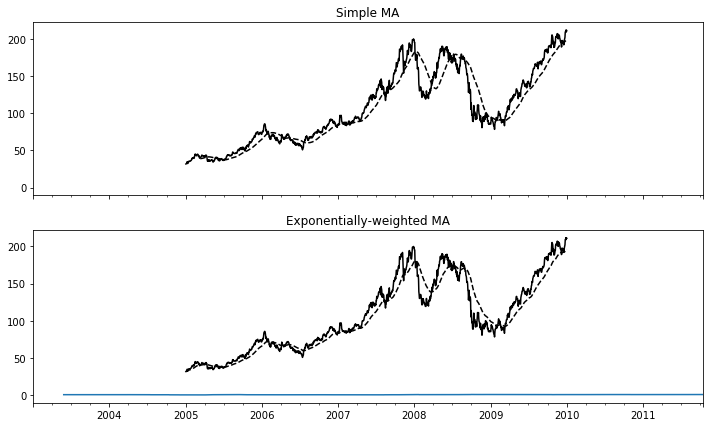

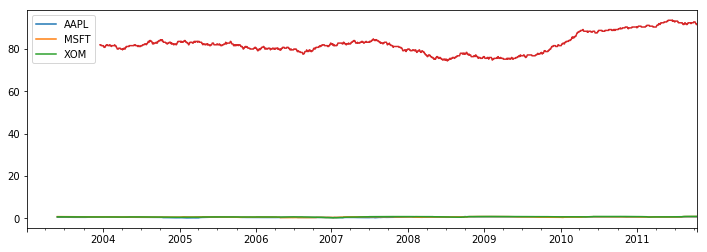

In [113]:
plt.show()